## Environment prep

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

## Load data

In [42]:
# Specify the path to your main folder
main_folder_path = '/Users/jonathankoong/Documents/GitHub/ESP32-WiFi-Sensing/datasets/03-tvat-segments'
# Initialize an empty dictionary to store lists of DataFrames for each activity
activity_dataframes = {}

# Iterate through subfolders
for activity_folder in os.listdir(main_folder_path):
    activity_folder_path = os.path.join(main_folder_path, activity_folder)

    # Check if it's a directory
    if os.path.isdir(activity_folder_path):
        # Initialize an empty list to store DataFrames for each file in the subfolder
        file_dataframes = []

        # Iterate through files in the subfolder
        for file_name in os.listdir(activity_folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(activity_folder_path, file_name)

                # Read the data from each CSV file into a DataFrame
                df = pd.read_csv(file_path)  # Adjust the read_csv parameters based on your file format
                file_dataframes.append(df)

        # Append the list of DataFrames for the activity to the dictionary
        activity_dataframes[activity_folder] = file_dataframes

In [43]:
print(activity_dataframes['LL'])

[     Unnamed: 0          0    1    2    3    4    5          6          7  \
0          5365  105.60303  4.0  0.0  0.0  0.0  0.0  28.925014  31.163170   
1          5366  105.60303  4.0  0.0  0.0  0.0  0.0  29.383947  32.018314   
2          5367  105.60303  4.0  0.0  0.0  0.0  0.0  29.848915  31.098585   
3          5368  105.60303  4.0  0.0  0.0  0.0  0.0  30.200321  31.460539   
4          5369  105.60303  4.0  0.0  0.0  0.0  0.0  31.026855  31.717062   
..          ...        ...  ...  ...  ...  ...  ...        ...        ...   
195        5560  105.60303  4.0  0.0  0.0  0.0  0.0  26.159120  24.728668   
196        5561  105.60303  4.0  0.0  0.0  0.0  0.0  26.223198  23.985468   
197        5562  105.60303  4.0  0.0  0.0  0.0  0.0  25.831910  24.637337   
198        5563  105.60303  4.0  0.0  0.0  0.0  0.0  27.756367  26.753496   
199        5564  105.60303  4.0  0.0  0.0  0.0  0.0  29.992605  29.498512   

             8  ...         55         56         57         58   59   60 

## Append label to a list

In [44]:
labels = []

### JJ

In [45]:
label = 0
for df in activity_dataframes['JJ']:
  labels.append(label)
  df.drop('timestamp',axis=1,inplace=True)

In [46]:
print(len(labels))

161


In [47]:
print(activity_dataframes['JJ'][3])

     Unnamed: 0          0    1          6          7          8          9  \
0          1613  105.60303  4.0  19.023188  18.802603  19.402203  21.357006   
1          1614  105.60303  4.0  17.249716  17.497097  18.748884  22.524504   
2          1615  105.60303  4.0  16.331420  20.109976  19.696682  21.550817   
3          1616  105.60303  4.0  13.543653  16.693766  17.564283  16.828530   
4          1617  105.60303  4.0  12.762930  14.598958  14.369660  12.623715   
..          ...        ...  ...        ...        ...        ...        ...   
195        1808  105.60303  4.0  15.134023  19.995115  19.150639  21.175924   
196        1809  105.60303  4.0  14.925275  19.133615  19.186024  21.641623   
197        1810  105.60303  4.0  14.370531  14.850043  15.988957  17.075544   
198        1811  105.60303  4.0  15.670268  14.427940  14.047097  18.498890   
199        1812  105.60303  4.0  14.213526  16.408216  14.931245  17.142012   

            10         11         12  ...         4

### LA

In [48]:
label = 1
for df in activity_dataframes['LA']:
  labels.append(label)
  df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['LA'][3])

     Unnamed: 0          0    1    2    3    4    5          6          7  \
0          2736  105.60303  4.0  0.0  0.0  0.0  0.0  24.149450  21.464054   
1          2737  105.60303  4.0  0.0  0.0  0.0  0.0  24.213438  23.208523   
2          2738  105.60303  4.0  0.0  0.0  0.0  0.0  24.438063  24.633118   
3          2739  105.60303  4.0  0.0  0.0  0.0  0.0  22.618048  25.124908   
4          2740  105.60303  4.0  0.0  0.0  0.0  0.0  23.623856  24.281189   
..          ...        ...  ...  ...  ...  ...  ...        ...        ...   
195        2931  105.60303  4.0  0.0  0.0  0.0  0.0  25.900776  27.509619   
196        2932  105.60303  4.0  0.0  0.0  0.0  0.0  21.288616  22.103853   
197        2933  105.60303  4.0  0.0  0.0  0.0  0.0  19.577509  19.550150   
198        2934  105.60303  4.0  0.0  0.0  0.0  0.0  19.672493  20.713448   
199        2935  105.60303  4.0  0.0  0.0  0.0  0.0  24.332684  25.511662   

             8  ...         54         55         56         57         58 

In [49]:
print(len(labels))

307


### LL

In [50]:
label = 2
for df in activity_dataframes['LL']:
  labels.append(label)
  df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['LL'][3])

     Unnamed: 0          0    1    2    3    4    5          6          7  \
0          1020  105.60303  4.0  0.0  0.0  0.0  0.0  24.919470  25.269474   
1          1021  105.60303  4.0  0.0  0.0  0.0  0.0  22.637350  22.543430   
2          1022  105.60303  4.0  0.0  0.0  0.0  0.0  18.050438  17.302551   
3          1023  105.60303  4.0  0.0  0.0  0.0  0.0  22.846302  23.326097   
4          1024  105.60303  4.0  0.0  0.0  0.0  0.0  29.200748  31.067127   
..          ...        ...  ...  ...  ...  ...  ...        ...        ...   
195        1215  105.60303  4.0  0.0  0.0  0.0  0.0  26.917282  28.724325   
196        1216  105.60303  4.0  0.0  0.0  0.0  0.0  26.123657  26.990849   
197        1217  105.60303  4.0  0.0  0.0  0.0  0.0  27.146906  26.955204   
198        1218  105.60303  4.0  0.0  0.0  0.0  0.0  28.170496  28.350693   
199        1219  105.60303  4.0  0.0  0.0  0.0  0.0  30.109777  28.329384   

             8  ...         54         55         56         57         58 

### NA

In [51]:
label = 3
for df in activity_dataframes['NA']:
  labels.append(label)
  df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['NA'][3])

     Unnamed: 0          0    1    2    3    4    5          6          7  \
0          5866  105.60303  4.0  0.0  0.0  0.0  0.0  28.717861  26.797623   
1          5867  105.60303  4.0  0.0  0.0  0.0  0.0  31.110634  29.811459   
2          5868  105.60303  4.0  0.0  0.0  0.0  0.0  30.465134  31.002815   
3          5869  105.60303  4.0  0.0  0.0  0.0  0.0  30.755507  29.629778   
4          5870  105.60303  4.0  0.0  0.0  0.0  0.0  31.188688  29.981950   
..          ...        ...  ...  ...  ...  ...  ...        ...        ...   
195        6061  105.60303  4.0  0.0  0.0  0.0  0.0  25.518677  26.272406   
196        6062  105.60303  4.0  0.0  0.0  0.0  0.0  25.987514  28.634874   
197        6063  105.60303  4.0  0.0  0.0  0.0  0.0  26.807245  28.592476   
198        6064  105.60303  4.0  0.0  0.0  0.0  0.0  28.203531  26.013798   
199        6065  105.60303  4.0  0.0  0.0  0.0  0.0  31.234370  29.122705   

             8  ...         54         55         56         57         58 

### RA

In [52]:
label = 4
for df in activity_dataframes['RA']:
  labels.append(label)
  df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['RA'][3])

     Unnamed: 0          0    1    2    3    4    5          6          7  \
0          2345  105.60303  4.0  0.0  0.0  0.0  0.0  20.713650  20.989317   
1          2346  105.60303  4.0  0.0  0.0  0.0  0.0  19.116726  18.238740   
2          2347  105.60303  4.0  0.0  0.0  0.0  0.0  17.894766  17.492252   
3          2348  105.60303  4.0  0.0  0.0  0.0  0.0  19.100077  19.689000   
4          2349  105.60303  4.0  0.0  0.0  0.0  0.0  18.358469  20.244078   
..          ...        ...  ...  ...  ...  ...  ...        ...        ...   
195        2540  105.60303  4.0  0.0  0.0  0.0  0.0  15.973177  15.063924   
196        2541  105.60303  4.0  0.0  0.0  0.0  0.0  16.199379  16.392500   
197        2542  105.60303  4.0  0.0  0.0  0.0  0.0  16.769728  17.877638   
198        2543  105.60303  4.0  0.0  0.0  0.0  0.0  17.172731  15.176518   
199        2544  105.60303  4.0  0.0  0.0  0.0  0.0  19.076107  16.842566   

             8  ...         54         55         56         57         58 

### RL

In [53]:
label = 5
for df in activity_dataframes['RL']:
  labels.append(label)
  df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['RL'][3])

     Unnamed: 0          0    1    2    3    4    5          6          7  \
0          6532  105.60303  4.0  0.0  0.0  0.0  0.0  21.930037  21.116856   
1          6533  105.60303  4.0  0.0  0.0  0.0  0.0  28.374626  27.102491   
2          6534  105.60303  4.0  0.0  0.0  0.0  0.0  29.888440  29.772610   
3          6535  105.60303  4.0  0.0  0.0  0.0  0.0  28.573833  27.245700   
4          6536  105.60303  4.0  0.0  0.0  0.0  0.0  24.770245  22.069345   
..          ...        ...  ...  ...  ...  ...  ...        ...        ...   
195        6727  105.60303  4.0  0.0  0.0  0.0  0.0  22.564598  22.707666   
196        6728  105.60303  4.0  0.0  0.0  0.0  0.0  30.116325  29.360952   
197        6729  105.60303  4.0  0.0  0.0  0.0  0.0  28.203370  20.303377   
198        6730  105.60303  4.0  0.0  0.0  0.0  0.0  31.741497  49.100685   
199        6731  105.60303  4.0  0.0  0.0  0.0  0.0  34.708958  62.658443   

             8  ...         54         55         56         57         58 

### SO

In [54]:
label = 6
for df in activity_dataframes['SO']:
  labels.append(label)
  df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['SO'][3])

     Unnamed: 0          0    1    2    3    4    5          6          7  \
0          2972  105.60303  4.0  0.0  0.0  0.0  0.0  23.575949  22.861840   
1          2973  105.60303  4.0  0.0  0.0  0.0  0.0  21.038994  18.676508   
2          2974  105.60303  4.0  0.0  0.0  0.0  0.0  21.304817  17.466682   
3          2975  105.60303  4.0  0.0  0.0  0.0  0.0  21.495660  20.367850   
4          2976  105.60303  4.0  0.0  0.0  0.0  0.0  21.778772  22.253300   
..          ...        ...  ...  ...  ...  ...  ...        ...        ...   
195        3167  105.60303  4.0  0.0  0.0  0.0  0.0  26.164944  24.522886   
196        3168  105.60303  4.0  0.0  0.0  0.0  0.0  27.741625  28.539415   
197        3169  105.60303  4.0  0.0  0.0  0.0  0.0  23.023872  24.217653   
198        3170  105.60303  4.0  0.0  0.0  0.0  0.0  20.873573  22.003190   
199        3171  105.60303  4.0  0.0  0.0  0.0  0.0  20.087868  22.617090   

             8  ...         54         55         56         57         58 

In [56]:
# Drop guard bands from all DataFrames to make them uniform
columns_to_drop = ['2', '3', '4', '5', '32', '59', '60', '61', '62', '63']

for activity, dataframes_list in activity_dataframes.items():
    for df in dataframes_list:
        # Drop guard bands (if they exist - JJ already has them dropped)
        df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
        # Drop Unnamed: 0 and columns 0, 1 (not CSI data)
        df.drop(columns=['Unnamed: 0', '0', '1'], errors='ignore', inplace=True)
        
print("Data cleaned! All DataFrames now have 54 subcarrier columns.")

Data cleaned! All DataFrames now have 54 subcarrier columns.


## Form data array from dataframes

In [58]:
# Assuming activity_dataframes is the dictionary of lists of DataFrames
activity_arrays = {}

for activity, dataframes_list in activity_dataframes.items():
    # Combine DataFrames along a new axis
    activity_array = np.stack([df.values for df in dataframes_list])
    activity_arrays[activity] = activity_array

# Concatenate activity arrays along a new axis
dataset_array = np.concatenate(list(activity_arrays.values()), axis=0)

In [59]:
print(dataset_array.shape)

(1157, 200, 52)


In [60]:
print(len(labels))

1157


### CNN

In [65]:
from sklearn.model_selection import train_test_split
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(dataset_array, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# X_train = X_train.astype('float32')
# X_train /= 255
# X_val = X_val.astype('float32')
# X_val /= 255 
# X_test = X_test.astype('float32')
# X_test /= 255

# Add channel dimension for Conv2D
X_train = X_train.reshape(-1, 200, 52, 1).astype('float32')
X_val = X_val.reshape(-1, 200, 52, 1).astype('float32')
X_test = X_test.reshape(-1, 200, 52, 1).astype('float32')

In [66]:
print(y_train)

[0 2 2 5 0 5 1 2 0 1 3 4 2 3 3 1 5 4 5 6 2 1 3 3 3 0 0 4 6 0 2 3 2 4 6 2 5
 3 2 6 6 3 1 2 1 4 0 0 5 1 3 1 3 3 6 5 6 4 2 6 2 5 2 1 1 0 3 0 0 0 2 1 0 3
 2 5 0 6 4 2 4 6 6 4 2 2 5 2 4 4 3 3 6 6 0 4 0 4 2 5 1 4 4 5 4 1 6 3 0 5 3
 5 3 6 5 1 5 3 2 3 3 5 0 3 4 5 2 4 6 0 2 1 1 2 2 2 2 5 2 5 6 6 3 2 4 3 0 2
 6 6 5 1 5 2 2 1 1 5 4 1 6 3 4 6 1 4 6 0 0 3 0 4 3 1 1 3 4 4 2 0 0 6 0 6 3
 6 4 3 3 3 2 4 0 2 2 6 3 0 0 5 4 4 2 3 3 0 1 4 1 5 1 4 0 6 6 4 0 4 5 1 6 1
 2 0 2 3 1 1 4 2 0 2 3 6 4 3 4 1 2 2 1 4 5 0 4 6 5 1 6 5 3 0 1 6 5 0 3 1 3
 6 0 4 0 4 5 2 3 4 1 2 3 2 4 4 3 6 6 4 6 4 3 5 5 4 4 6 2 5 1 5 1 0 0 3 3 0
 4 2 3 3 6 3 5 2 6 0 2 6 2 4 4 1 2 0 3 3 0 6 1 5 5 1 0 0 1 3 2 5 3 3 5 3 2
 5 1 0 3 1 6 1 4 1 3 5 6 3 0 5 1 1 5 0 4 5 1 0 0 6 3 5 5 6 3 2 0 5 3 4 5 2
 4 6 2 2 1 4 5 2 2 1 0 5 4 3 0 1 6 1 4 2 4 4 4 3 4 4 2 2 4 5 2 2 0 6 4 3 4
 3 0 2 3 3 0 6 3 6 4 4 0 2 4 3 0 1 2 3 6 4 2 3 6 6 6 5 4 1 2 0 4 2 6 6 4 1
 1 0 3 0 2 5 6 3 5 2 2 4 1 1 4 0 5 0 4 1 4 0 2 4 0 0 5 3 2 4 1 1 1 3 6 3 0
 5 6 3 3 4 5 4 0 0 2 5 0 

In [67]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout,Attention

# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, 7, activation='relu', input_shape=(200, 52, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 5, activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(7, activation='softmax')

])

# Compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 194, 46, 32)    │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 97, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 93, 19, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,783,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,877,703 (26.24 MB)

 Trainable params: 6,877,703 (26.24 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:

history = model.fit(X_train, y_train, epochs=100, batch_size=40,validation_data=(X_val, y_val))

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.1330 - loss: 2.9843 - val_accuracy: 0.1897 - val_loss: 1.9330
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.1470 - loss: 1.9746 - val_accuracy: 0.1466 - val_loss: 1.9399
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.1578 - loss: 1.9495 - val_accuracy: 0.1638 - val_loss: 1.9390
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.1708 - loss: 1.9298 - val_accuracy: 0.1379 - val_loss: 1.9392
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.1838 - loss: 1.9253 - val_accuracy: 0.1638 - val_loss: 1.9330
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.1816 - loss: 1.9139 - val_accuracy: 0.1552 - val_loss: 1.9333
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.2097 - loss: 1.8921 - val_accuracy: 0.1466 - val_loss: 1.9251
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.2249 - loss: 1.8814 - val_accu

KeyboardInterrupt: 

In [71]:
# Simpler CNN Model
model = keras.Sequential([
    # First conv block - fewer filters
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 52, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    # Second conv block
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    # Third conv block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    # Dense layers - much smaller
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),  # Reduced from 0.5
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),  # Reduced from 0.25
    keras.layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Higher LR to start
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/Users/jonathankoong/Documents/GitHub/ESP32-WiFi-Sensing/env/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 198, 50, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 198, 50, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 99, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 97, 23, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 97, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 48, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 46, 9, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 46, 9, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 4, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5888)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       753,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 786,759 (3.00 MB)

 Trainable params: 786,279 (3.00 MB)

 Non-trainable params: 480 (1.88 KB)

In [72]:
history = model.fit(X_train, y_train, epochs=100, batch_size=40,validation_data=(X_val, y_val))

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.2022 - loss: 2.4266 - val_accuracy: 0.1466 - val_loss: 2.7335
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3470 - loss: 1.7525 - val_accuracy: 0.1466 - val_loss: 2.1083
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4541 - loss: 1.4510 - val_accuracy: 0.1552 - val_loss: 2.0859
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5557 - loss: 1.2585 - val_accuracy: 0.1552 - val_loss: 2.1596
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6368 - loss: 1.0825 - val_accuracy: 0.1983 - val_loss: 2.0023
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6789 - loss: 0.9297 - val_accuracy: 0.1724 - val_loss: 2.2008
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6908 - loss: 0.8587 - val_accuracy: 0.2155 - val_loss: 2.0876
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7730 - loss: 0.7030 - val_accuracy: 0.

### DNN

In [ ]:
import tensorflow as tf

# Define the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.SGD()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
flat = dataset_array.reshape(1176 * 200, 45)
print(flat.shape)

(235200, 55)


In [ ]:
all_labels = []
for key, dataframe_list in activity_dataframes.items():
    for dataframe in dataframe_list:
        # Append the label to the labels list for each row in the DataFrame
        for index, row in dataframe.iterrows():
            all_labels.append((key))

In [ ]:
print(all_labels)

['JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
all_labels = label_encoder.fit_transform(all_labels)

In [ ]:
from sklearn.model_selection import train_test_split

data = dataset_array
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = np.array(y_train)
print(y_train.shape)

(940,)


In [ ]:
import tensorflow as tf

flattened_data = tf.reshape(data, [-1, data.shape[1] * data.shape[2]])
one_hot_encoded_data = tf.keras.utils.to_categorical(flattened_data)
encoded_data = one_hot_encoded_data.reshape(data[0], data[1], -1)
print(encoded_data.shape)

In [ ]:
print(X_train.shape)

(940, 200, 55)


In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128,validation_split=0.2)

Epoch 1/30


InvalidArgumentError: ignored

## Evaluation

In [73]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import matplotlib.pyplot as plt

In [74]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Confusion matrix, without normalization
[[ 6  1  1  2  0  0  3]
 [ 4  6  2  3  1  0  1]
 [ 3  4  2  4  2  1  2]
 [ 4  1  1 11  1  0  0]
 [ 4  1  2  6  4  2  2]
 [ 4  1  2  3  2  0  3]
 [ 4  2  1  4  0  1  2]]
Per class:  [0.46153846 0.35294118 0.11111111 0.61111111 0.19047619 0.
 0.14285714]


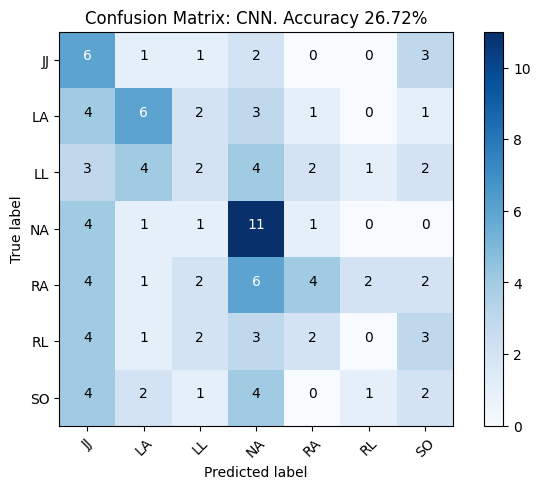

In [75]:
predictions = model.predict(X_test)

rounded_predictions = np.argmax(predictions, axis=-1)

cm_plot_labels = ['JJ', 'LA', 'LL', 'NA', 'RA', 'RL', 'SO']
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)
accuracy = accuracy_score(y_test, rounded_predictions) * 100
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=f'Confusion Matrix: CNN. Accuracy {accuracy:.02f}%')
print("Per class: ", cm.diagonal()/cm.sum(axis=1))